In [1]:
NAME = "Mohamed Rakha"

---

# Lab 6: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [2]:
#!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim



--2020-10-28 17:08:21--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.114.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.114.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  34.8MB/s    in 46s     

2020-10-28 17:09:07 (34.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



### **Q1 (1 point)** 
Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [3]:
#Replace 0 with the code / value; Do not delete this cell
from gensim.models import KeyedVectors,Word2Vec
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

similarity_pair1 = model.similarity('France','England')
similarity_pair2 = model.similarity('smaller','bigger')
similarity_pair3 = model.similarity('England','London')
similarity_pair4 = model.similarity('France','Rocket')
similarity_pair5 = model.similarity('big','bigger')



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [4]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


### **Q2 (1 point)** 
Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [5]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = model['France'][:5]
vector_2 = model['England'][:5]
vector_3 = model['smaller'][:5]
vector_4 = model['bigger'][:5]
vector_5 = model['rocket'][:5]
vector_6 = model['big'][:5]


In [6]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


### **Q3 (1 point)** 
Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [7]:
#Replace 0 with the code / value; Do not delete this cell
eu_dist1 = np.linalg.norm(model['France'] - model['England'])
eu_dist2 = np.linalg.norm(model['smaller'] - model['bigger'])
eu_dist3 = np.linalg.norm(model['England'] - model['London'])
eu_dist4 = np.linalg.norm(model['France'] - model['Rocket'])
eu_dist5 = np.linalg.norm(model['big'] - model['bigger'])



In [8]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


3.0151067
1.8618743
2.8752837
3.892071
1.9586496


### **Q4 (1 point)**
Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [11]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = model.most_similar(positive=['King','Queen'], negative=['Man'])[:2]
closest2 = model.most_similar(positive=['bigger','small'], negative=['big'])[:2]
closest3 = model.most_similar(positive=['waiting','run'], negative=['wait'])[:2]
closest4 = model.most_similar(positive=['Texas','Milwaukee'], negative=['Wisconsin'])[:2]






/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [12]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


### **Q5 (3 points)**
Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

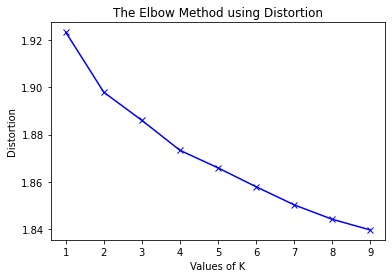

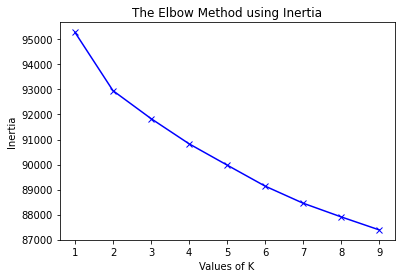

In [18]:
# YOUR CODE HERE
from random import sample
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  


w = sample(list(model.vocab), 20000)

X = np.array([model[i] for i in w])

distortions = [] 
inertias = []
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)   
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show();
plt.figure()
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

Using the Elbow method, we can see that k=2 would produce the best clustering.

In [21]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

cluster_1 = model.similar_by_vector(kmeans.cluster_centers_[0])[:10]
cluster_2 = model.similar_by_vector(kmeans.cluster_centers_[1])[:10]
print(cluster_1)
print(cluster_2)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Emil_Protalinski_Published', 0.9244628548622131), ('By_HuDie_####-##-##', 0.9185153245925903), ('BY_GEOFF_KOHL', 0.9183104634284973), ('By_QianMian_####-##-##', 0.9180808067321777), ('By_XiaoBing_####-##-##', 0.9156231880187988), ('By_Riva_Froymovich', 0.915049135684967), ('STACY_LEE', 0.9145373106002808), ('BY_DANNY_GALLAGHER', 0.9139887094497681), ('By_Ted_Holteen', 0.9104115962982178), ('REYNOLDS_GALLERY', 0.9094964265823364)]
[('http_dol##.net_index###.html_http', 0.9133076071739197), ('dol##.net_index####.html_http_dol##.net', 0.9040823578834534), ('Deltagen_undertakes', 0.9037028551101685), ('index###.html_http_dol##.net_index###.html', 0.9019854664802551), ('Manufacturing_bioplastics', 0.898175835609436), ('By_TRICIA_SCRUGGS', 0.8980089426040649), ('BY_STEFANIE_WHITE', 0.8961238861083984), ('PRESCRIPTION_DRUGS_Gradually', 0.8957065343856812), ('EXCO_undertakes', 0.8938989639282227), ('Jyothi_Mahalingham', 0.8920680284500122)]


The first cluster seems to be authors/publishers. The second cluster seems to be more random, which is expected using a bunch of random words that must be clustered into 2 clusters only.

### **Q6 (1 point)**
What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [22]:
# YOUR CODE HERE
# The loss function the model uses is an entropy loss function. It uses stochastic gradient descent to
# optimize the objective function.

### **Bonus Question (1 point)** 
Find at least 2 interesting word vec combinations like the ones given in Q4

**Do not delete the below cell**

In [26]:
# YOUR CODE HERE
print(model.most_similar(positive=['Berkeley','Stanford'], negative=['Los_Angeles'])[:2])
print(model.most_similar(positive=['Google','Facebook'], negative=['Amazon'])[:2])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('UC_Berkeley', 0.5877782702445984), ('Harvard', 0.5630755424499512)]
[('social_networking', 0.6394062042236328), ('Gmail', 0.6102304458618164)]
